## Problem 1.

Using the data set called `problem1.csv (x_training, y_training)`:

a) Find the polynomial that fits the best training data

b) Using the AIC criteria, find the best polynomial that can fit the data.

c) Cross validate the polynomial with the data set called `problem1.csv (x_test, y_test)`

### Todo List:

- [x] Finish coding part

- [ ] Add comments

In [89]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

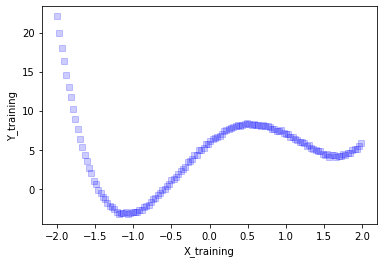

In [90]:
data = pd.read_csv('data/problem1.csv')
X_training = data['X_training']
Y_training = data['Y_training']

ax = plt.plot(X_training, Y_training, 'bs', alpha=0.2,)
plt.xlabel('X_training')
plt.ylabel('Y_training')
plt.show()


### (a) Polynomial Fitting

#### Module Import

In [91]:
import numpy.polynomial.polynomial as poly

In [92]:
coef = poly.polyfit(X_training, Y_training, 8, rcond=None, w=None) # Assuming a Polynomyal degree 8

In [93]:
model = poly.Polynomial(coef)
model

Polynomial([ 6.00793895e+00,  8.03796810e+00, -6.06320867e+00, -3.02503500e+00,
        2.09500406e+00,  8.00105182e-03, -4.29431659e-02, -1.12113794e-03,
        5.73512923e-03], domain=[-1,  1], window=[-1,  1])

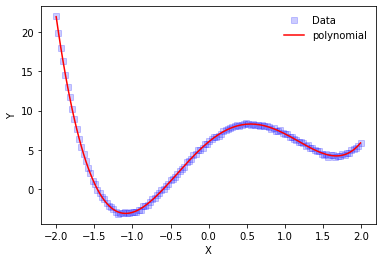

In [94]:
plt.plot(X_training, Y_training, 'bs', alpha=0.2, label='Data')
plt.plot(X_training, model(X_training), 'r', label='polynomial')
plt.legend(loc='best', frameon=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (b) Find the best-fit polynomial

Here we use the AIC criteria to find the best polynomial that can fit the data.

In [95]:
Pol_Max = 15 # Highest degree polynomial we are going to check.
# empty arrays
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

In [96]:
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(X_training, Y_training, i+1)
        model = poly.Polynomial(coef)
        RSSv[i] = 0.5*np.sum((Y_training-model(X_training))**2)
        AICv[i] = len(X_training)*math.log10(RSSv[i]/len(X_training)) + \
                2*len(coef)*len(X_training)/(len(X_training)-len(coef)-1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


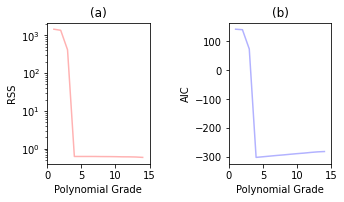

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv, 'r', alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv, 'b', alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

In [98]:
grade = np.argmin(AICv)+1
grade

4

In [99]:
coef = poly.polyfit(X_training, Y_training, grade)

best_poly_model = poly.Polynomial(coef)
best_poly_model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

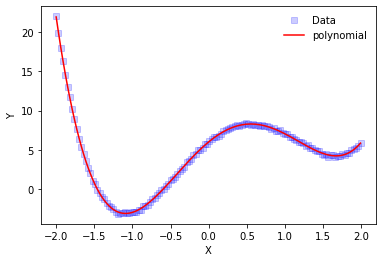

In [100]:
plt.plot(X_training, Y_training, 'bs', alpha=0.2, label='Data')
plt.plot(X_training, best_poly_model(X_training), 'r', label='polynomial')
plt.legend(loc='best', frameon=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (c) Cross validate the polynomial

Import test data

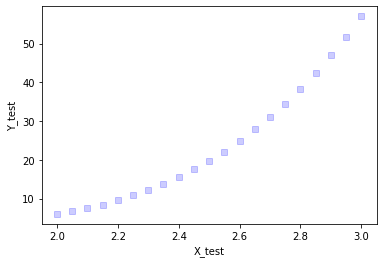

In [101]:
data = pd.read_csv('data/problem1.csv')
X_test = data['X_test']
Y_test = data['Y_test']

ax = plt.plot(X_test, Y_test, 'bs', alpha=0.2,)
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.show()

Display test data with best-fit polynomial

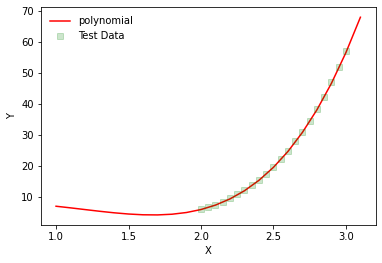

In [106]:
x = np.arange(1.5, 3.2, 0.1)

# plt.plot(x, np.log(model(x)), 'r', label='polynomial')
# plt.plot(X_test, np.log(Y_test),'gs', alpha=0.2, label='Test Data')
# plt.plot(X_training, np.log(Y_training), 'bs', alpha=0.2, label='Train Data')

# plt.plot(x, model(x), 'b--', label='polynomial')
plt.plot(x, best_poly_model(x), 'r', label='polynomial')
plt.plot(X_test, Y_test,'gs', alpha=0.2, label='Test Data')
# plt.plot(X_training, Y_training, 'bs', alpha=0.2, label='Train Data')


plt.legend(loc='best', frameon=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

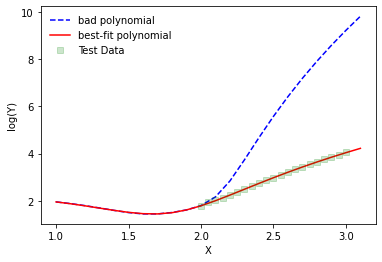

In [111]:
x = np.arange(1, 3.2, 0.1)

plt.plot(x, np.log(model(x)), 'b--', label='bad polynomial')
plt.plot(x, np.log(best_poly_model(x)), 'r', label='best-fit polynomial')
plt.plot(X_test, np.log(Y_test),'gs', alpha=0.2, label='Test Data')
# plt.plot(X_training, np.log(Y_training), 'bs', alpha=0.2, label='Train Data')


plt.legend(loc='best', frameon=False)
plt.xlabel('X')
plt.ylabel('log(Y)')
plt.show()